In [1]:
!pip install -q yfinance

In [2]:
!pip install pandas-datareader

In [3]:
pip install -U tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

tech_list=['AAPL','GOOG','MSFT', 'AMZN']

tech_list=['AAPL','GOOG','MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock,start,end)
    
company_list = [AAPL, GOOG , MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]


for company,com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-09,93.680000,96.209999,92.180000,92.250000,92.250000,56218700,AMAZON
2023-03-10,92.669998,93.570000,90.250000,90.730003,90.730003,69747500,AMAZON
2023-03-13,89.970001,94.019997,88.120003,92.430000,92.430000,72397100,AMAZON
2023-03-14,93.830002,95.070000,92.709999,94.879997,94.879997,60912700,AMAZON
2023-03-15,93.220001,96.669998,93.070000,96.199997,96.199997,70731800,AMAZON
2023-03-16,95.750000,100.989998,95.610001,100.040001,100.040001,84446900,AMAZON
2023-03-17,99.790001,100.660004,97.459999,98.949997,98.949997,87173200,AMAZON
2023-03-20,98.410004,98.480003,95.699997,97.709999,97.709999,62388900,AMAZON
2023-03-21,98.139999,100.849998,98.000000,100.610001,100.610001,58597300,AMAZON


In [4]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,150.047064,152.141309,148.153413,150.227182,149.754048,8.236199e+07
std,11.836720,11.759665,11.885075,11.856883,11.707036,2.347806e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,3.519590e+07
25%,142.120003,143.987495,139.974998,142.472496,141.981434,6.782410e+07
50%,148.884995,150.930000,147.264999,149.375000,148.933762,7.730035e+07
75%,156.512501,158.277496,154.204994,156.792496,155.910637,9.039920e+07
max,178.550003,179.610001,176.699997,178.960007,177.882462,1.826020e+08


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-03-22 to 2023-03-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


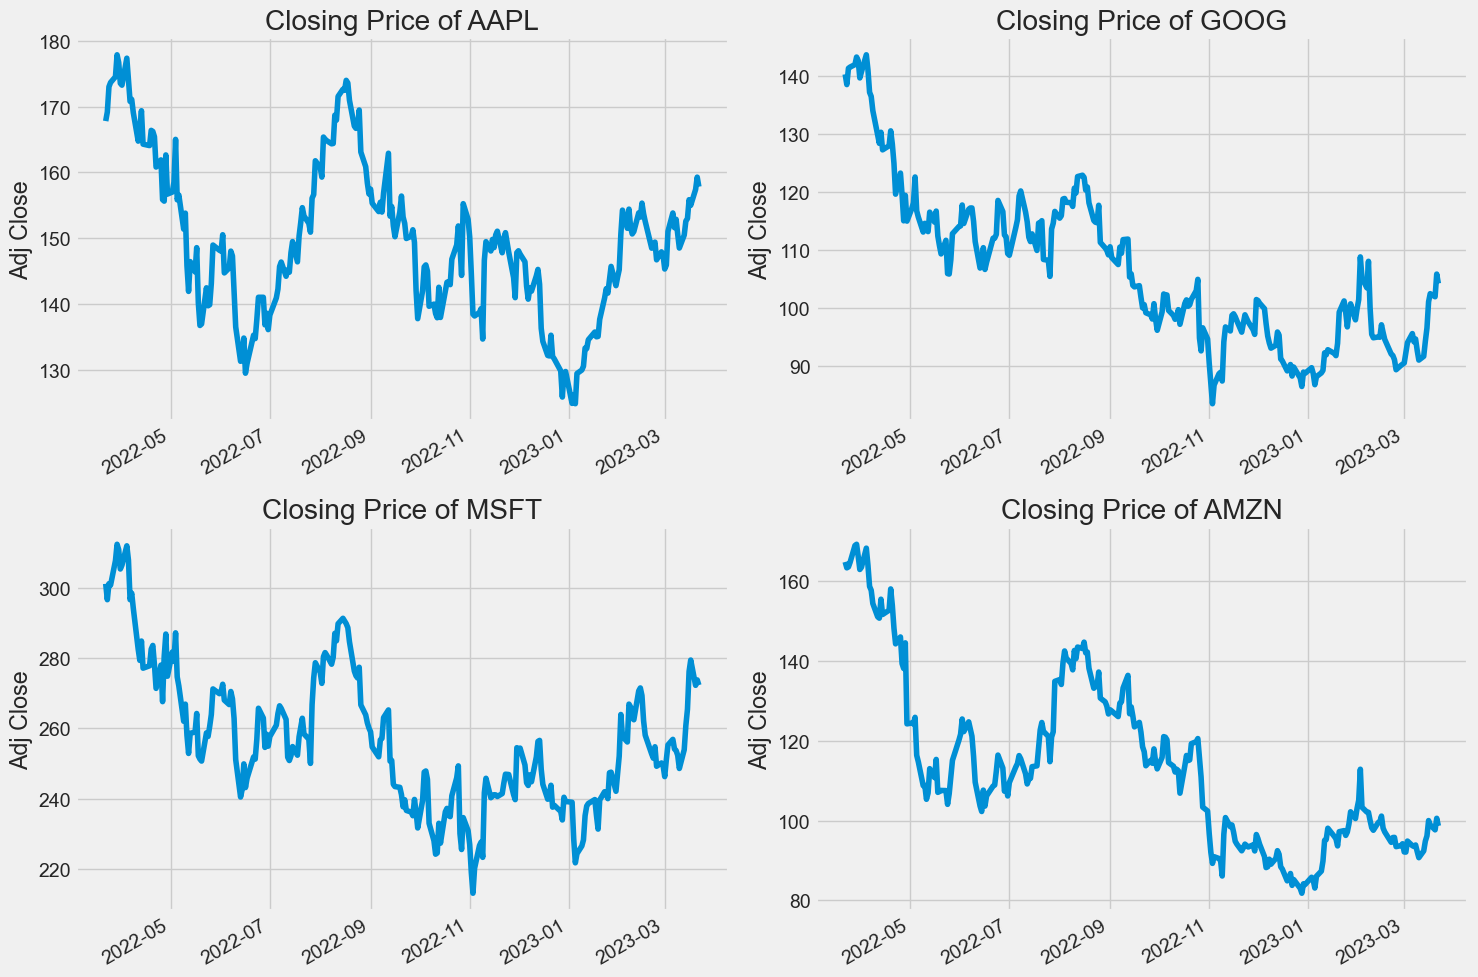

In [6]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel("Adj Close")
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i-1]}")
    
plt.tight_layout()
            

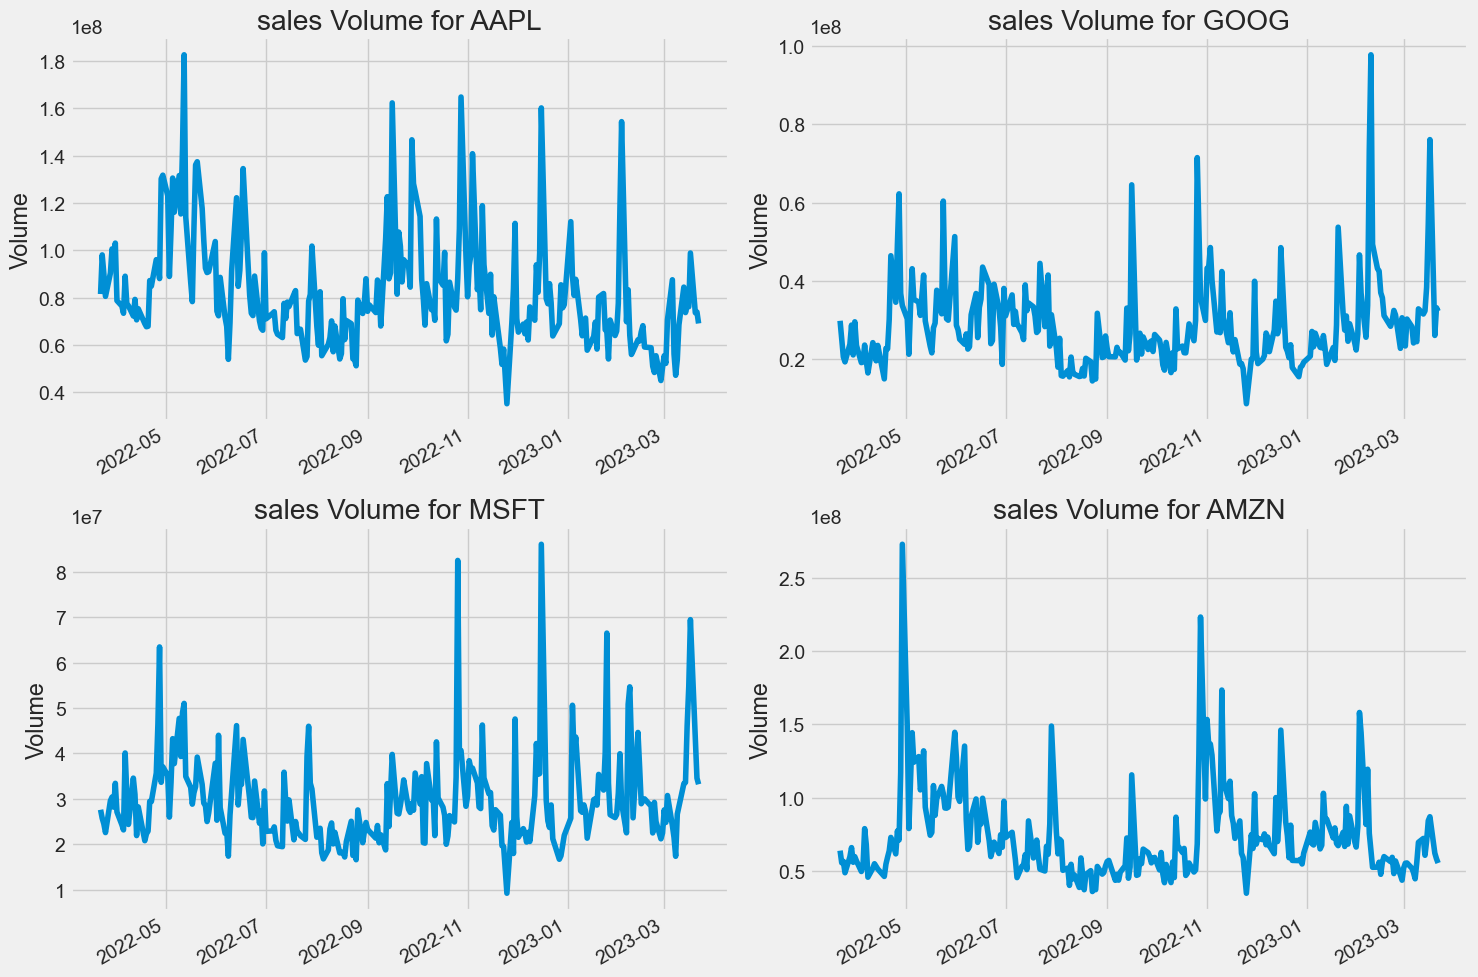

In [7]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25,bottom=1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"sales Volume for {tech_list[i -1]}")
    
    
plt.tight_layout()

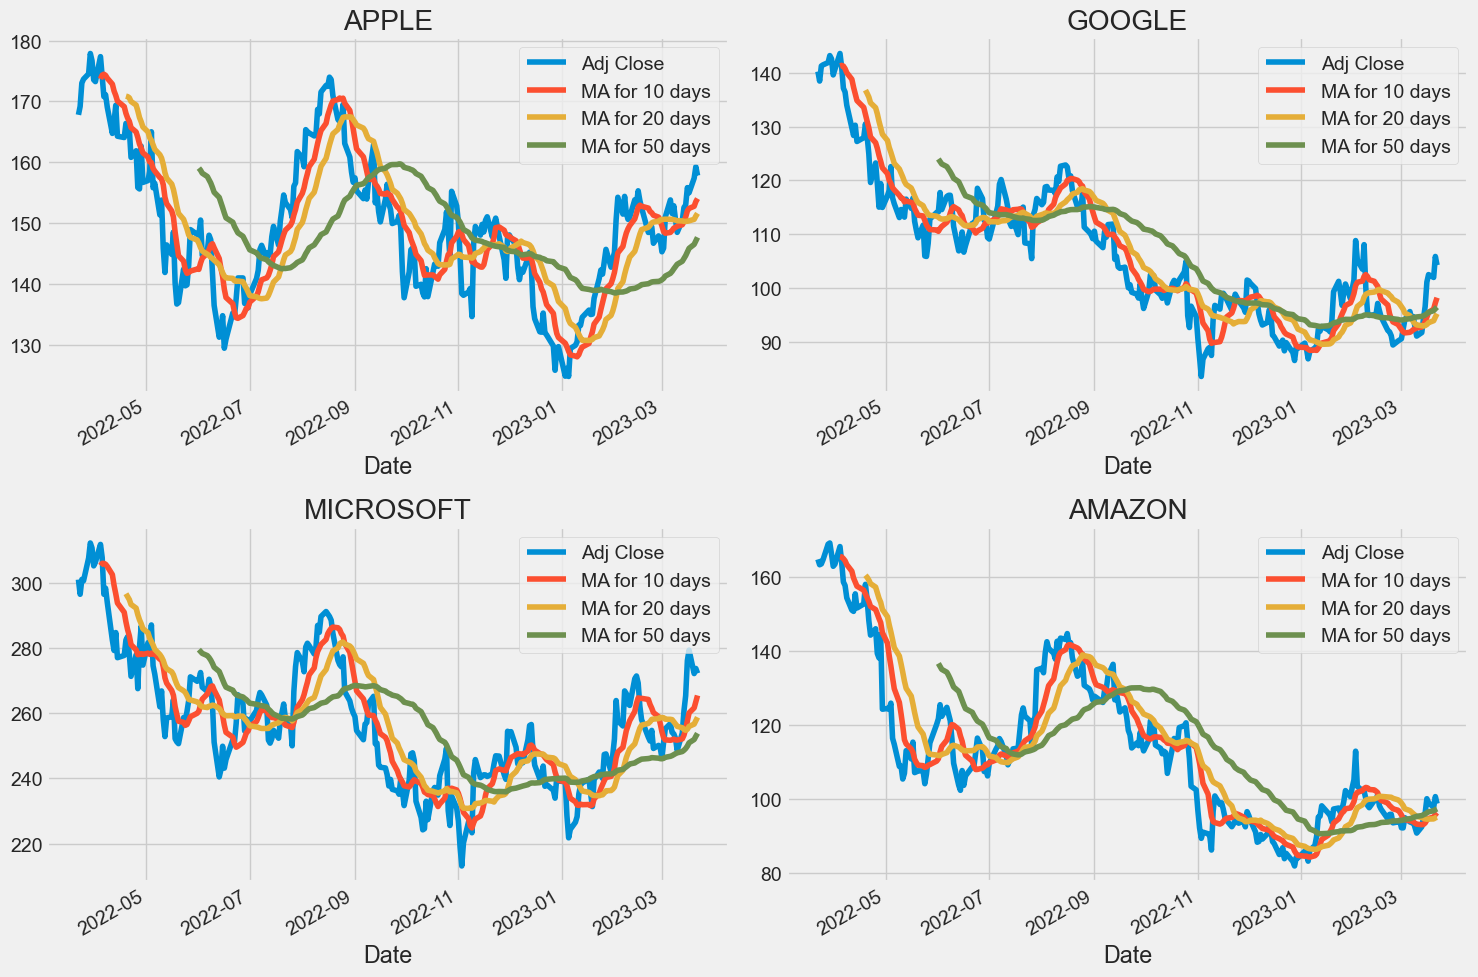

In [8]:
ma_day = [10,20,50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company["Adj Close"].rolling(ma).mean()
        
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')


GOOG[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')


MSFT[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')


AMZN[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()



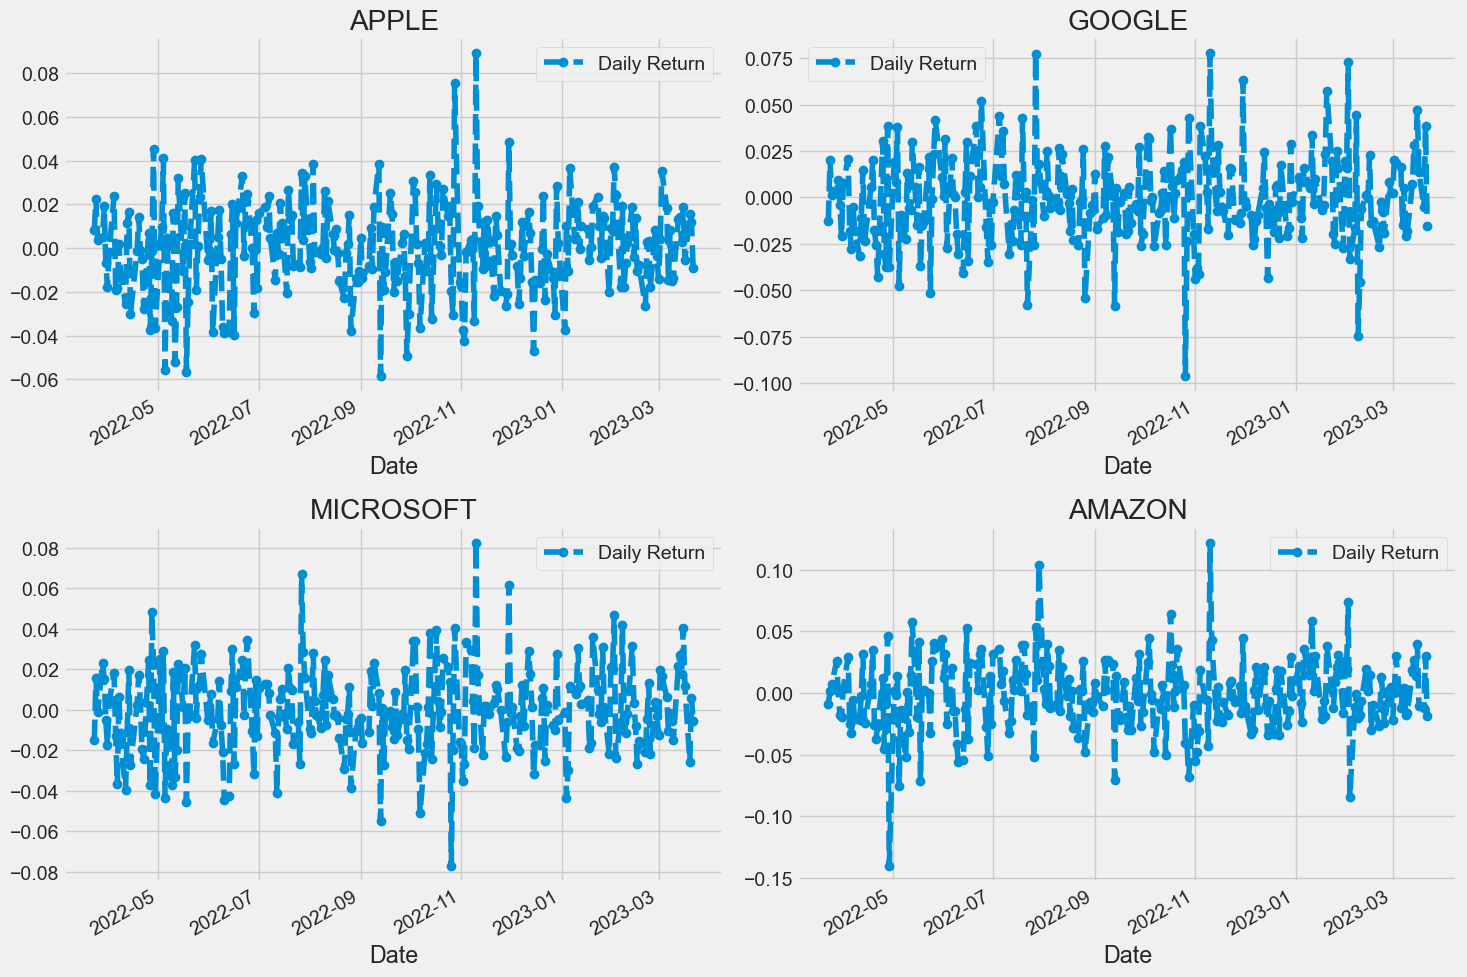

In [9]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
    
AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')
    
GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')
    
MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')
    
AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')
    
fig.tight_layout()
    

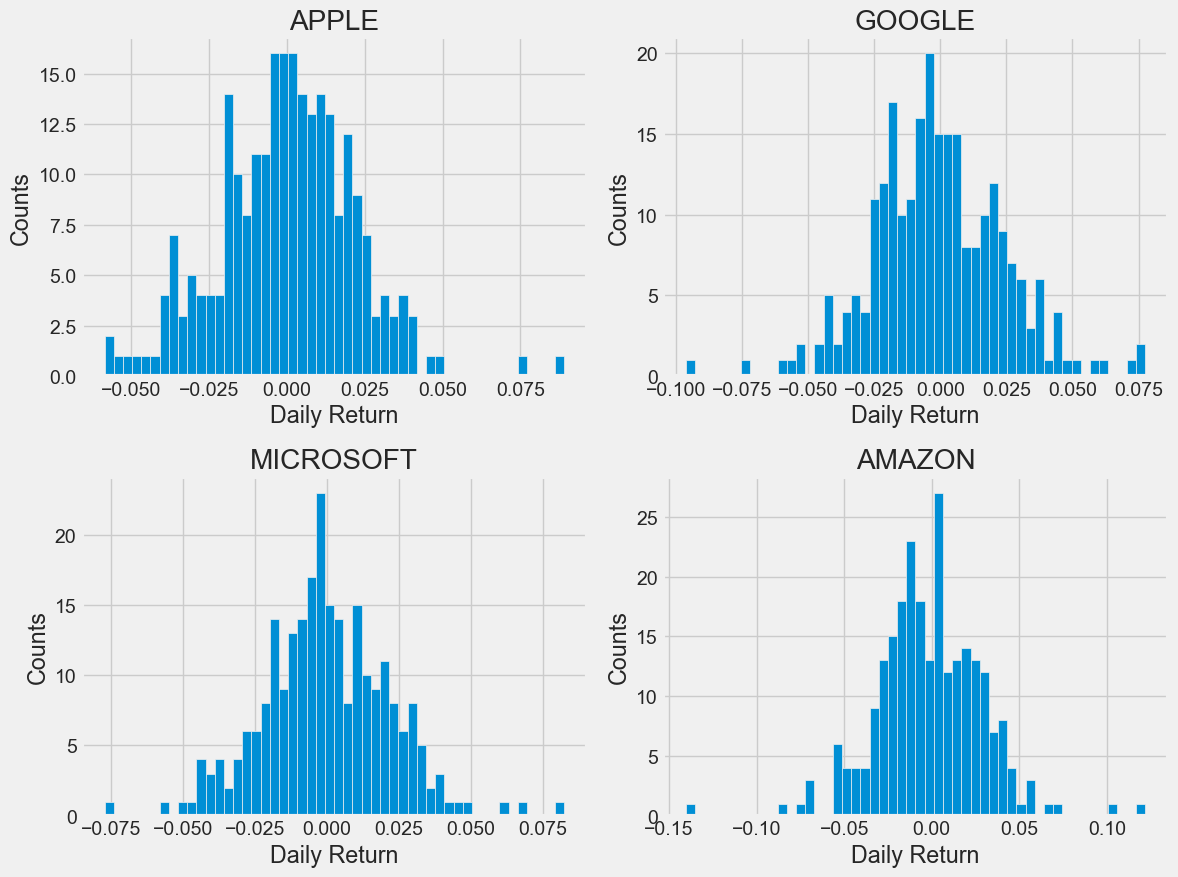

In [10]:
plt.figure(figsize=(12,9))

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i-1]}')
    
plt.tight_layout()

In [11]:
closing_df = pdr.get_data_yahoo(tech_list, start=start,end=end)['Adj Close']


tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-22,NaN,NaN,NaN,NaN
2022-03-23,0.008234,-0.008982,-0.012646,-0.015030
2022-03-24,0.022678,0.001478,0.020277,0.015393
2022-03-25,0.003734,0.006868,0.001483,-0.001381
2022-03-28,0.005037,0.025593,0.003028,0.023116


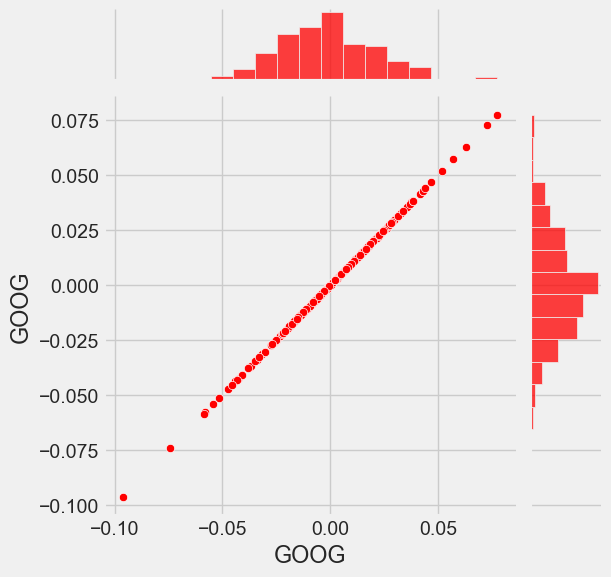

In [12]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets, kind='scatter', color='red')

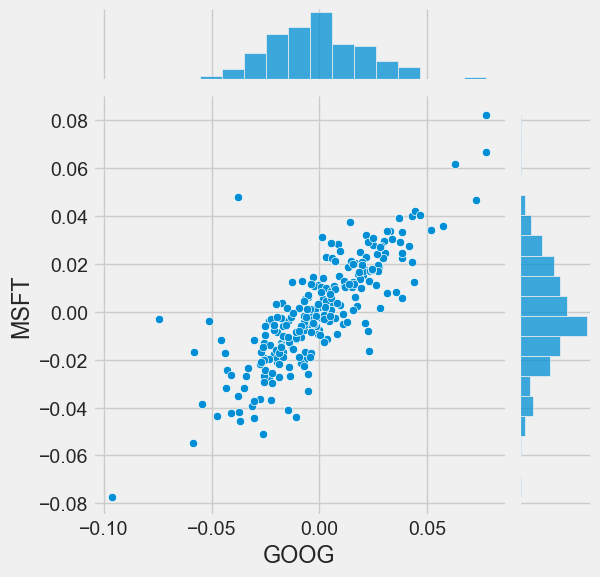

In [13]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets, kind='scatter')

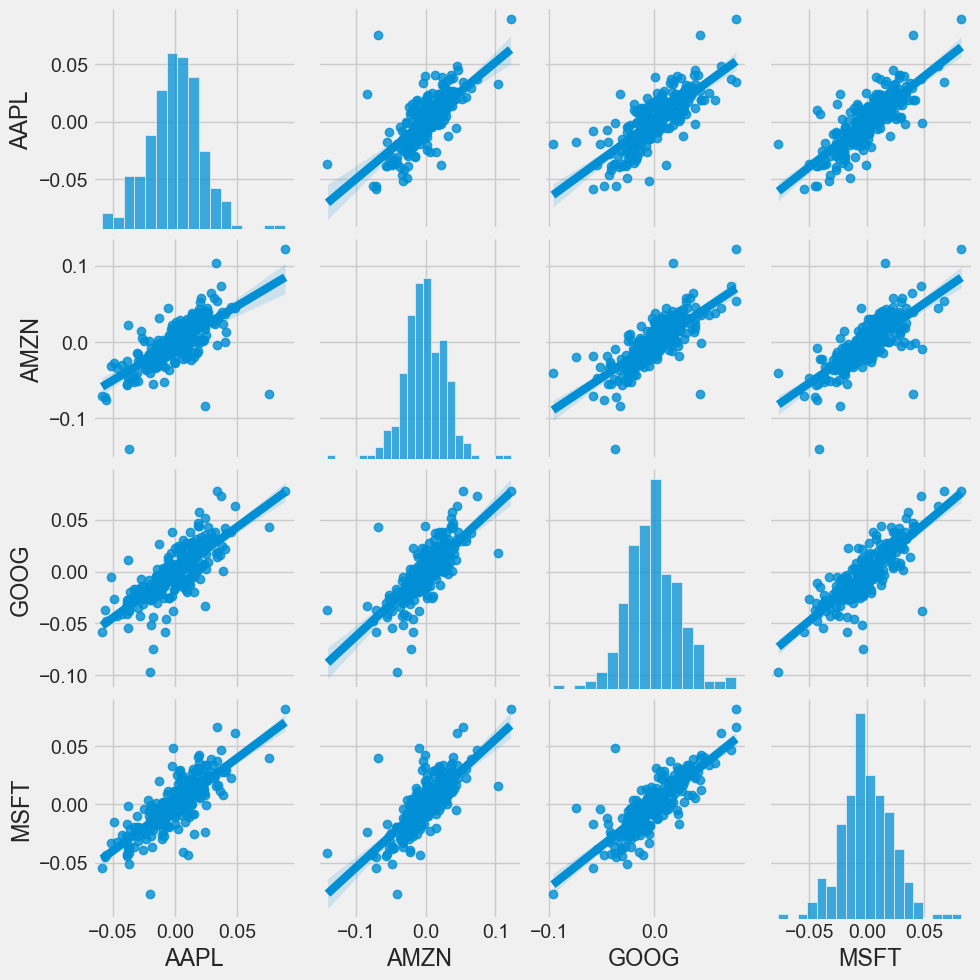

In [14]:
sns.pairplot(tech_rets,kind='reg')

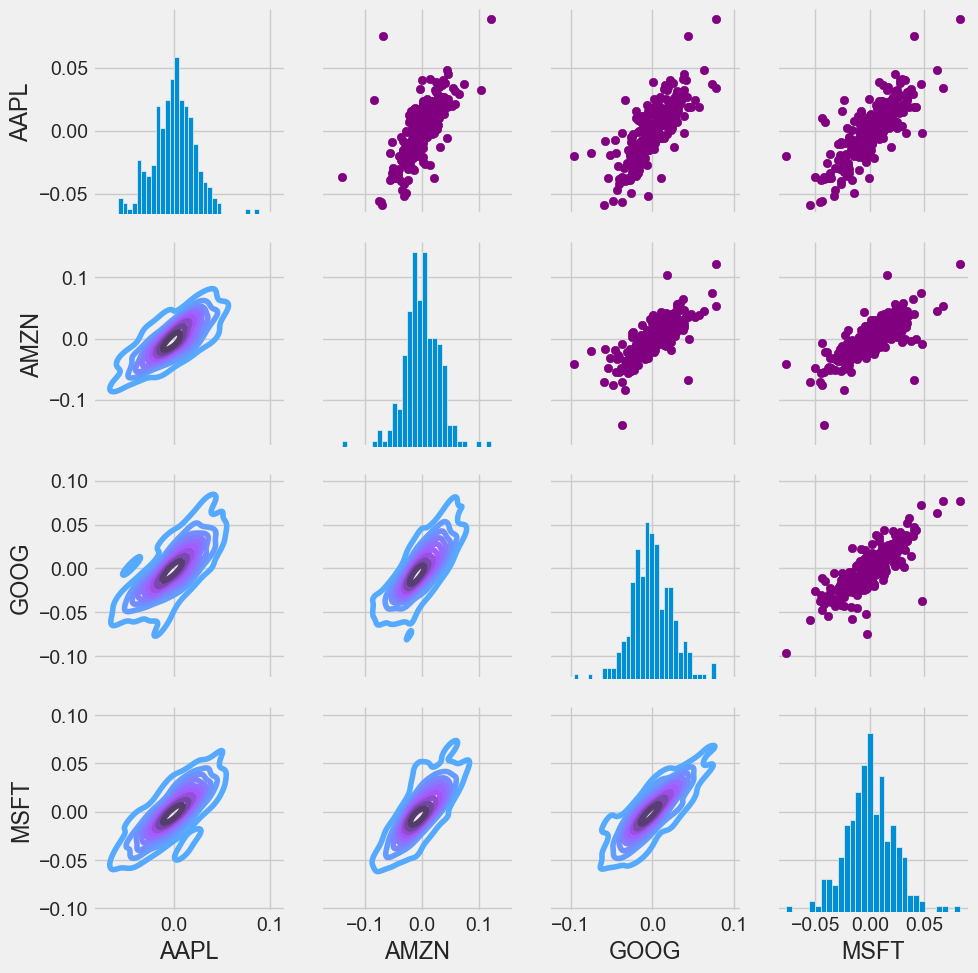

In [15]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

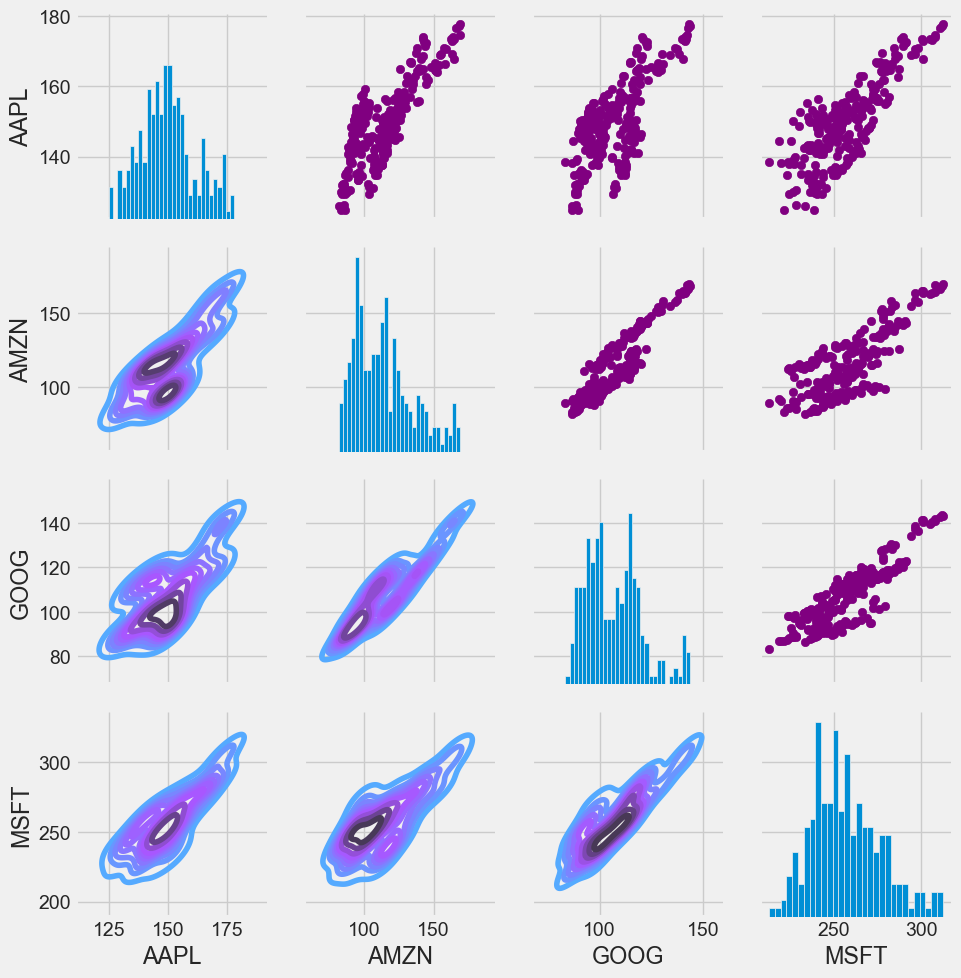

In [16]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)


Text(0.5, 1.0, 'Correlation of stock closing price')

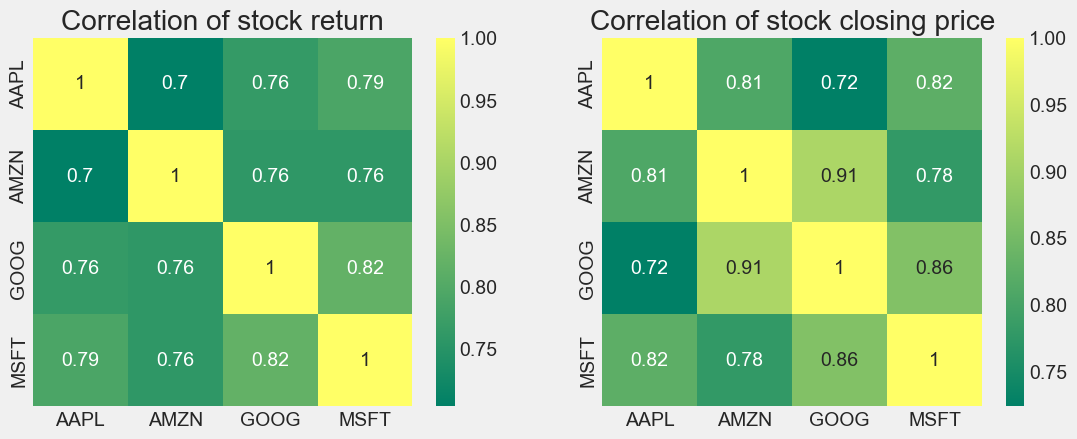

In [17]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True,cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(),annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

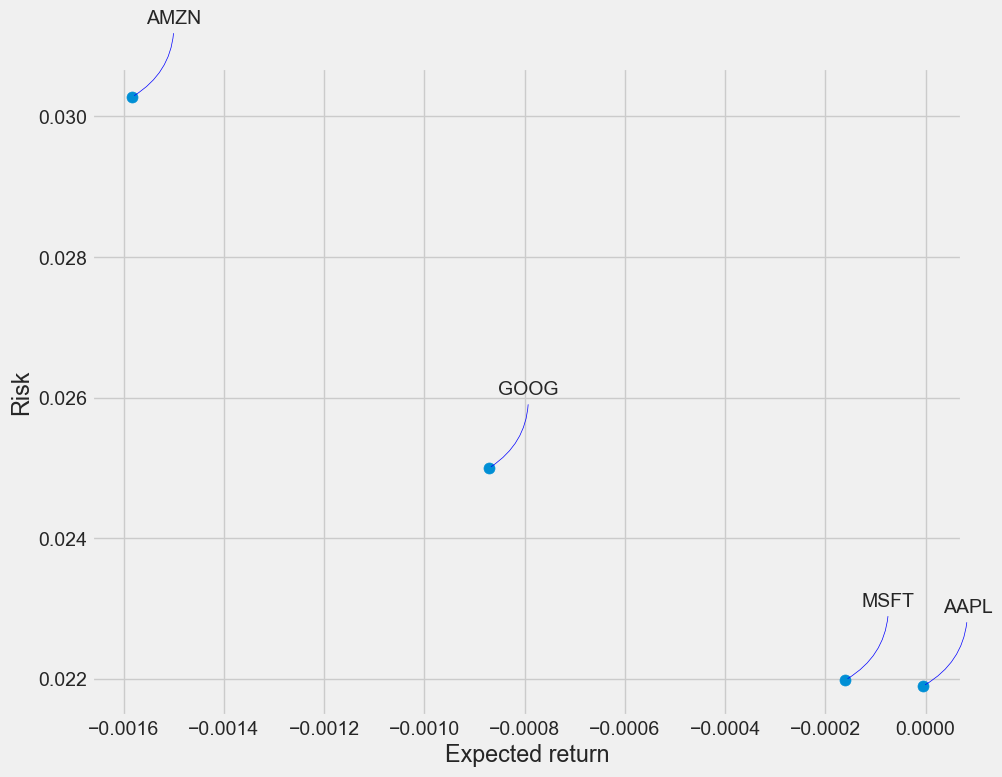

In [18]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10,8))
plt.scatter(rets.mean(),rets.std(), s= area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50,50),textcoords='offset points', ha='right',va='bottom',
                 arrowprops=dict(arrowstyle='-',color='blue',connectionstyle='arc3,rad=-0.3'))

In [19]:
df= pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())

df
                        
        

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500193,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567371,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706892,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839727,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819362,394024400
...,...,...,...,...,...,...
2023-03-16,152.160004,156.460007,151.639999,155.850006,155.850006,76161100
2023-03-17,156.080002,156.740005,154.279999,155.000000,155.000000,98862500
2023-03-20,155.070007,157.820007,154.149994,157.399994,157.399994,73641400


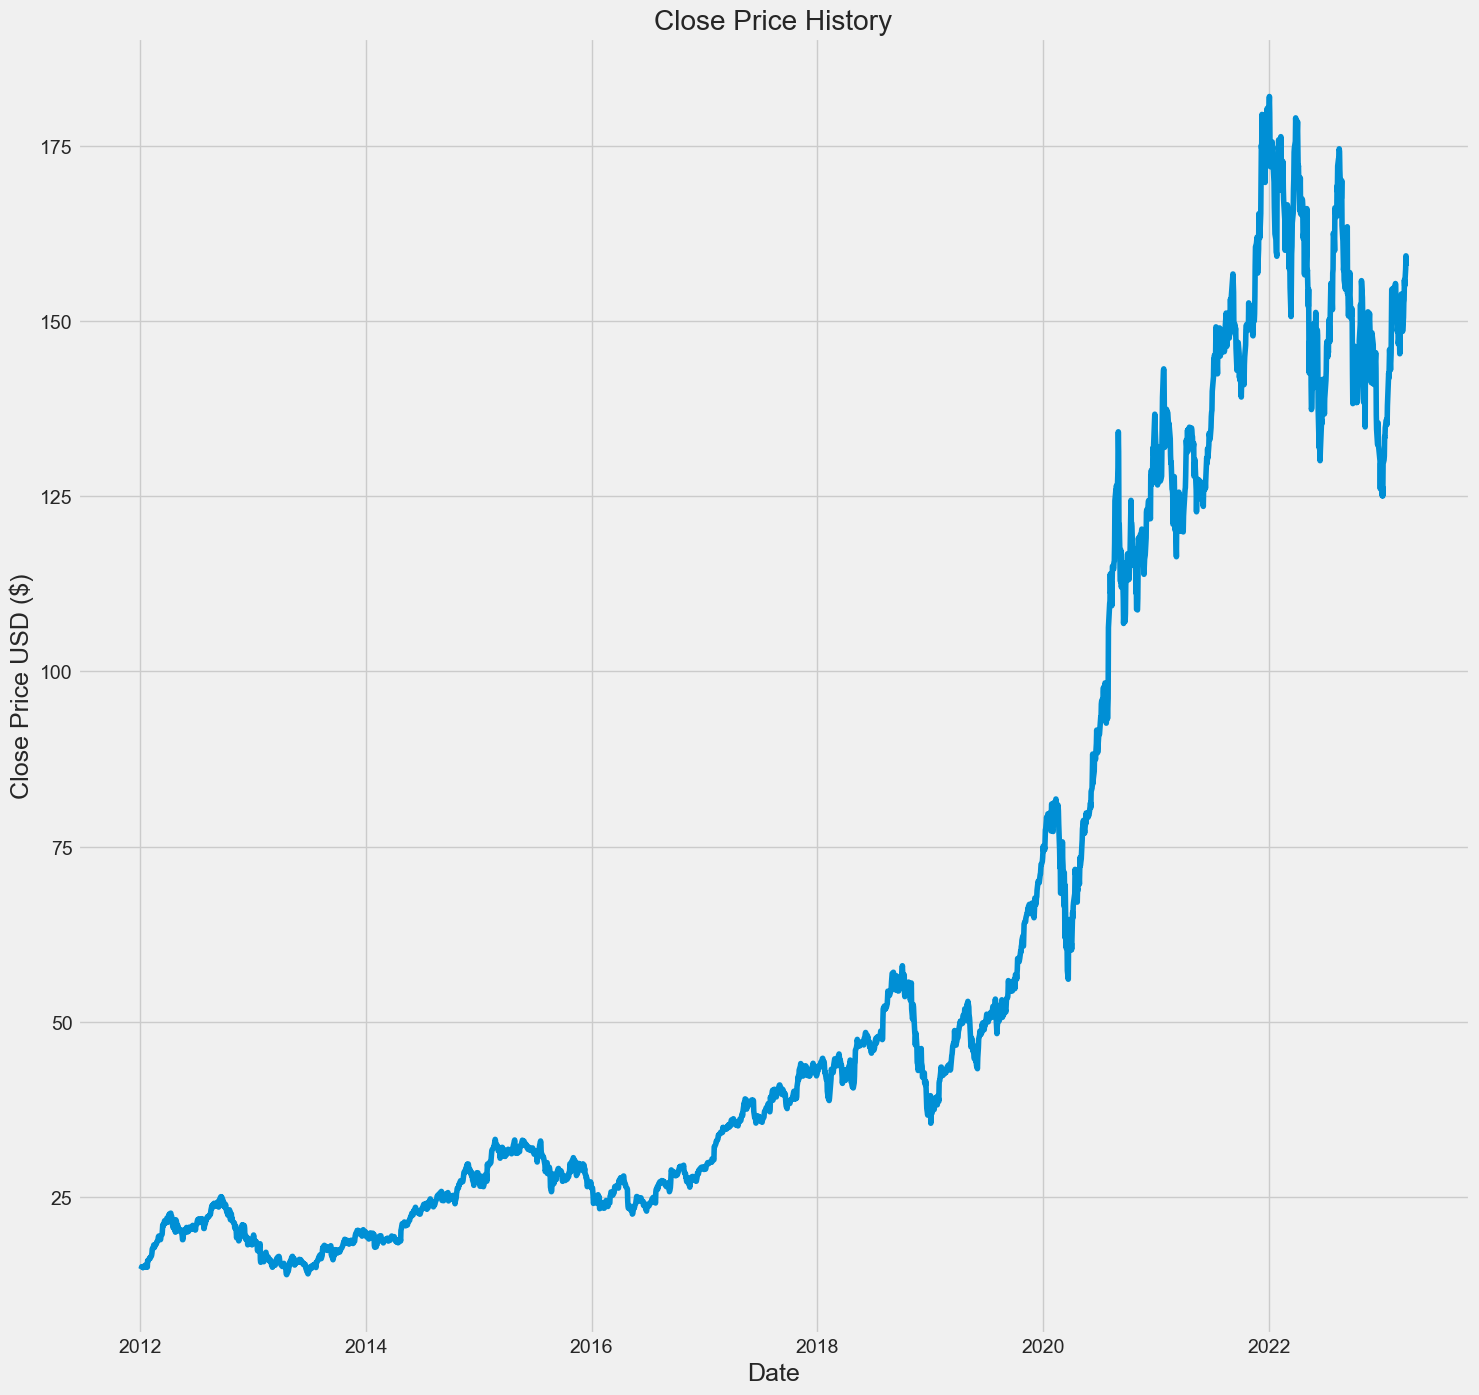

In [20]:
plt.figure(figsize=(16,16))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [21]:
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil(len(dataset)*.95))

training_data_len

2682

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.85356637],
       [0.86475272],
       [0.85612499]])

In [23]:
train_data = scaled_data[0:int(training_data_len),:]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

                     

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(x_train,y_train, batch_size=1, epochs=1)

In [24]:
x_train.shape

(2622, 60, 1)

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60,len (test_data)):
    x_test.append(test_data[i-60:i,0])
    
    
x_test = np.array(x_test)

x_test = np.resahpe(x_test, (x_test.shape[0], x_test.shape[1],1))

predictions = model.predict(x_test)
predictions = scaler.iverse_transform(predictions)

rmse= np.sqrt(np.mean(((predictions - y_test) **2)))
rmse

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
valid